<a href="https://colab.research.google.com/github/FGalvao77/Implementando-o-SVM-para-prever-comprador-online/blob/main/Implementando_o_SVM_para_prever_comprador_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**SVM para classificação**</font>
- primeiro vamos conhecer como funciona o `SVM`

In [1]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version
print(f'Versão Python: {python_version()}')

Versão Python: 3.7.11


In [2]:
# instalando a biblioteca "watermark"
!pip install -q -U watermark 
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

In [3]:
# da biblioteca do sklearn do módulo "datasets" importando o conjunto de dados "load_breast_cancer"
from sklearn.datasets import load_breast_cancer

In [4]:
# instanciando o conjunto de dados na variável "data"
data = load_breast_cancer()

In [5]:
# visualizando informações gerais sobre o nosso conjunto de dados
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
# separando os dados e instanciando nas variáveis "X" (independentes) e a "y" (dependente - target)
X = data.data
y = data.target

**Podemos instanciar o conjunto de dados já separando as variáveis independentes e dependente, como segue abaixo:**
```python
# carregando os dados e instanciando nas variáveis "X" (independentes) e a "y" (dependente - target)
X, y = load_digits(return_X_y=True)
```

In [7]:
# visualizando a quantidade de dados da variável "X"
X.shape # linhas e colunas

(569, 30)

In [8]:
# visualizando a quantidade de dados da variável "y"
y.shape # linhas

(569,)

In [9]:
# da biblioteca do sklearn do módulo "model_selection" importando as funções "train_test_split" e "GridSearchCV"
from sklearn.model_selection import train_test_split, GridSearchCV

In [10]:
# com a função "train_test_split" iremos dividir as variáveis "X" e "y" em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
                                                          # separando 30% dos dados para teste

In [11]:
# visualizando a quantidade de dados de treino e teste
print('Quantidade de dados:')
print(f'''X_train: {X_train.shape} 
X_test: {X_test.shape} 
y_train: {y_train.shape}
y_test: {y_test.shape}''')

Quantidade de dados:
X_train: (398, 30) 
X_test: (171, 30) 
y_train: (398,)
y_test: (171,)


### <font color='green'>**Aplicando o SVM**<font>

In [12]:
# importando as bibilotecas, módulos e as funções

import time # para trabalhar com tempo
import pandas as pd # para modelagem de dados
import numpy as np # para modelagem matemática

# da biblioteca do sklearn do módulo "svm" importando a função "SVC"
from sklearn.svm import SVC # "support vector classifier" - modelo de classificação

# da biblioteca do sklearn do módulo "preprocessing" importando a função "StandardScaler"
from sklearn.preprocessing import StandardScaler

# da biblioteca do sklearn do módulo "metrics" importando a funções de avaliação
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# para ignorar alertas de erro
import warnings
warnings.filterwarnings('ignore')

In [13]:
# versões das bibliotecas usadas no notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão - Machine Learning com SVM #LeadDELL' --iversions

Author: Fernando Galvão - Machine Learning com SVM #LeadDELL

IPython: 5.5.0
numpy  : 1.19.5
pandas : 1.1.5



### <font color='blue'>**Modelo com kernel "Linear"**</font>

In [14]:
# instanciando o modelo
mod_1 = SVC(kernel = 'linear')

In [15]:
# treinando o modelo
start = time.time()
mod_1.fit(X_train, y_train)
end = time.time()
print('Tempo de treinamento do mod_1: ', end - start)

Tempo de treinamento do mod_1:  0.6685736179351807


In [16]:
# realizando as previsões
pred_1 = mod_1.predict(X_test)

In [17]:
# dicionário de métricas e metadados
SVM_dict_mod_1 = {
    'Modelo': 'SVM',
    'Versão': '1',
    'Kernel': 'Linear',
    'Precision': precision_score(pred_1, y_test),
    'Recall': recall_score(pred_1, y_test),
    'F1 Score': f1_score(pred_1, y_test),
    'Acurácia': accuracy_score(pred_1, y_test),
    'AUC': roc_auc_score(pred_1, y_test)
}

# visualizando as métricas
print('Métricas de testes:')
SVM_dict_mod_1

Métricas de testes:


{'AUC': 0.9681641887524242,
 'Acurácia': 0.9707602339181286,
 'F1 Score': 0.9789029535864979,
 'Kernel': 'Linear',
 'Modelo': 'SVM',
 'Precision': 0.9830508474576272,
 'Recall': 0.9747899159663865,
 'Versão': '1'}

### <font color='blue'>**Modelo com kernel "Linear" e dados padronizados (Scaled)**</font>

In [18]:
# realizando a padronização dos dados

# instanciando o modelo para escalar os dados
sc = StandardScaler()

# realizando a padronização dos dados de treino e teste
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

> ### <font color='red'>**Obs:**</font> somente aplique a padronização depois de ter feito a divisão dos dados em treino e teste.

In [19]:
# visualizando a transformação dos dados de treino
X_train_scaled

array([[-1.2580597 , -0.84851801, -1.27316457, ..., -0.98790145,
        -0.12981389, -0.17123744],
       [-0.75770885, -0.18497931, -0.78513519, ..., -0.77682683,
        -0.28916463, -1.05722783],
       [-0.38771106, -0.42127547, -0.38037737, ..., -0.50982124,
        -1.47561769, -0.76014811],
       ...,
       [-1.21992147,  0.04176952, -1.1716644 , ..., -0.28838339,
        -0.47533679, -0.00590156],
       [-0.615402  ,  2.14934027, -0.64054923, ..., -0.68965377,
        -0.75143956, -0.1612648 ],
       [-1.2580597 , -0.02506171, -1.25535025, ..., -1.07476971,
         0.4302803 , -0.25836683]])

In [20]:
# visualizando a transformação dos dados de teste
X_test_scaled

array([[-0.03763623,  0.48333304, -0.10114834, ..., -0.56057059,
        -1.10011792, -0.46411815],
       [ 0.16443949,  1.47864109,  0.10226629, ..., -0.10535045,
        -0.31756378, -0.81106107],
       [ 0.84751233, -0.67427943,  0.98469632, ...,  2.11207609,
         1.80290551,  1.09633767],
       ...,
       [-0.17994307, -1.97748853, -0.17903418, ..., -0.64530524,
        -0.33649654, -0.68771525],
       [ 1.43097038, -0.7840736 ,  1.41141132, ...,  0.93402062,
        -0.75775048, -1.18109853],
       [-0.23401967, -0.80316824, -0.23786285, ...,  0.82886431,
         0.95250898,  0.87064107]])

In [21]:
# instanciando o modelo
mod_2 = SVC(kernel = 'linear')

In [22]:
# treinando o modelo
start = time.time()
mod_2.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de treinamento do mod_2: ', end - start)

Tempo de treinamento do mod_2:  0.0031769275665283203


In [23]:
# realizando as previsões
pred_2 = mod_2.predict(X_test_scaled)

In [24]:
# dicionário de métricas e metadados
SVM_dict_mod_2 = {
    'Modelo': 'SVM',
    'Versão': '2',
    'Kernel': 'Linear com dados padronizados',
    'Precision': precision_score(pred_2, y_test),
    'Recall': recall_score(pred_2, y_test),
    'F1 Score': f1_score(pred_2, y_test),
    'Acurácia': accuracy_score(pred_2, y_test),
    'AUC': roc_auc_score(pred_2, y_test)
}

# visualizando as métrica
print('Métricas de testes:')
SVM_dict_mod_2

Métricas de testes:


{'AUC': 0.9819812540400775,
 'Acurácia': 0.9824561403508771,
 'F1 Score': 0.9873417721518987,
 'Kernel': 'Linear com dados padronizados',
 'Modelo': 'SVM',
 'Precision': 0.9915254237288136,
 'Recall': 0.9831932773109243,
 'Versão': '2'}

### <font color='blue'>**Otimização dos hiperparâmetros com Grid Search e kernel "RBF"**</font>

In [25]:
# instanciando o modelo
mod_3 = SVC(kernel = 'rbf')

In [26]:
# definindo os valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3.0*0.001])

In [27]:
# instanciando o grid dos hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

In [28]:
# instanciando o modelo
start = time.time()
mod_3_grid_search_rbf = GridSearchCV(mod_3, 
                                    svm_param_grid,
                                    cv = 3)

In [29]:
# treinando o modelo
mod_3_grid_search_rbf.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de treinamento do modelo com Grid Search: ', end - start)

Tempo de treinamento do modelo com Grid Search:  8.759715557098389


In [30]:
# acurácia do modelo em treinamento e o melhor hiperparâmetro
print(f'Acurácia em treinamento: {mod_3_grid_search_rbf.best_score_ :.2%}\n')
print(f'Hiperparâmetros ideais: {mod_3_grid_search_rbf.best_params_}')

Acurácia em treinamento: 98.24%

Hiperparâmetros ideais: {'C': 100.0, 'gamma': 0.001}


In [31]:
# avaliando as previsões
pred_3 = mod_3_grid_search_rbf.predict(X_test_scaled)

In [32]:
# dicionário de métricas e metadados
SVM_dict_mod_3 = {
    'Modelo': 'SVM',
    'Versão': '3',
    'Kernel': 'RBF com dados padronizados e Grid Search',
    'Precision': precision_score(pred_3, y_test),
    'Recall': recall_score(pred_3, y_test),
    'F1 Score': f1_score(pred_3, y_test),
    'Acurácia': accuracy_score(pred_3, y_test),
    'AUC': roc_auc_score(pred_3, y_test)
}

print('Métricas de testes:\n')
SVM_dict_mod_3

Métricas de testes:



{'AUC': 0.9636752136752137,
 'Acurácia': 0.9707602339181286,
 'F1 Score': 0.978723404255319,
 'Kernel': 'RBF com dados padronizados e Grid Search',
 'Modelo': 'SVM',
 'Precision': 0.9745762711864406,
 'Recall': 0.9829059829059829,
 'Versão': '3'}

### <font color='blue'>**Otimização dos hiperparâmetros com Grid Search e kernel "Polinomial"**</font>

In [33]:
# instanciando o modelo
mod_4 = SVC(kernel = 'poly')

In [34]:
# definindo os valores para o grid
r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2, 3, 4])

In [35]:
# instanciando o grid dos hiperparâmetros
svm_param_grid_poly = dict(gamma = gamma_range, 
                           degree = d_range,
                           coef0 = r_range)

In [36]:
# instanciando o modelo
start = time.time()
mod_4_grid_search_poly = GridSearchCV(mod_4, 
                                      svm_param_grid_poly,
                                      cv = 3)

In [37]:
# treinando o modelo
mod_4_grid_search_poly.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de treinamento do modelo com Grid Search: ', end - start)

Tempo de treinamento do modelo com Grid Search:  4.235596656799316


In [38]:
# acurácia do modelo em treinamento
print(f'Acurácia em treinamento: {mod_4_grid_search_poly.best_score_ :.2%}\n')
print(f'Hiperparâmetros ideais: {mod_4_grid_search_poly.best_params_}')

Acurácia em treinamento: 97.99%

Hiperparâmetros ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [39]:
# avaliando as previsões
pred_4 = mod_4_grid_search_poly.predict(X_test_scaled)

In [40]:
# dicionário de métricas e metadados
SVM_dict_mod_4 = {
    'Modelo': 'SVM',
    'Versão': '4',
    'Kernel': 'Polinomial com dados padronizados e Grid Search',
    'Precision': precision_score(pred_4, y_test),
    'Recall': recall_score(pred_4, y_test),
    'F1 Score': f1_score(pred_4, y_test),
    'Acurácia': accuracy_score(pred_4, y_test),
    'AUC': roc_auc_score(pred_4, y_test)
}

print('Métricas de testes:\n')
SVM_dict_mod_4

Métricas de testes:



{'AUC': 0.9726574992005117,
 'Acurácia': 0.9766081871345029,
 'F1 Score': 0.9830508474576272,
 'Kernel': 'Polinomial com dados padronizados e Grid Search',
 'Modelo': 'SVM',
 'Precision': 0.9830508474576272,
 'Recall': 0.9830508474576272,
 'Versão': '4'}

In [41]:
# realizando a concatenação dos dicionários dos modelos em um único dataframe do pandas
resumo = pd.DataFrame({
    'SVM_mod_1': pd.Series(SVM_dict_mod_1), 
    'SVM_mod_2': pd.Series(SVM_dict_mod_2), 
    'SVM_mod_3': pd.Series(SVM_dict_mod_3), 
    'SVM_mod_4': pd.Series(SVM_dict_mod_4)
})

# visualizando o dataframe criado com as métricas de avalição
resumo

,SVM_mod_1,SVM_mod_2,SVM_mod_3,SVM_mod_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear com dados padronizados,RBF com dados padronizados e Grid Search,Polinomial com dados padronizados e Grid Search
Precision,0.983051,0.991525,0.974576,0.983051
Recall,0.97479,0.983193,0.982906,0.983051
F1 Score,0.978903,0.987342,0.978723,0.983051
Acurácia,0.97076,0.982456,0.97076,0.976608
AUC,0.968164,0.981981,0.963675,0.972657


> #### <font color='green'>**Obs:** o modelo 3 como kernel `RBF` e suas métricas `Precision (100%)`, `F1 Score (~98%)` e `AUC (~ 98%)` foi o que obteve melhor performance.</font>

In [42]:
# versões das bibliotecas usadas no notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão - Machine Learning com SVM #LeadDELL' --iversions

Author: Fernando Galvão - Machine Learning com SVM #LeadDELL

IPython: 5.5.0
numpy  : 1.19.5
pandas : 1.1.5



## <font color='orange'>**Aplicando o SVM de modo mais simples**</font>

In [43]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version
print(f'Versão Python: {python_version()}')

Versão Python: 3.7.11


In [44]:
# biblioteca para ignorar alertas de erro
import warnings
warnings.filterwarnings('ignore')

In [45]:
# da biblioteca do sklearn do módulo "datasets" importando o conjunto de dados "load_breast_cancer"
from sklearn.datasets import load_breast_cancer

In [46]:
# instanciando o conjunto de dados na variável "data"
data = load_breast_cancer()

In [47]:
# visualizando informações gerais sobre o nosso conjunto de dados
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [48]:
# separando os dados e instanciando nas variáveis "X" (independentes) e a "y" (dependente - target)
X = data.data
y = data.target

In [49]:
# visualizando a quantidade de dados da variável "X" e "y"
print('X:', X.shape) # linhas e colunas
print('y:', y.shape) # linhas

X: (569, 30)
y: (569,)


In [50]:
# da biblioteca do sklearn do módulo "model_selection" importando as funções "train_test_split" e "GridSearchCV"
from sklearn.model_selection import train_test_split, GridSearchCV

In [51]:
# com a função "train_test_split" iremos dividir as variáveis "X" e "y" em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
                                                          # separando 30% dos dados para teste

In [52]:
# visualizando a quantidade de dados de treino e teste
print('Quantidade de dados:')
print(f'''X_train: {X_train.shape} 
X_test: {X_test.shape} 
y_train: {y_train.shape}
y_test: {y_test.shape}''')

Quantidade de dados:
X_train: (398, 30) 
X_test: (171, 30) 
y_train: (398,)
y_test: (171,)


In [53]:
# importando as bibilotecas, módulos e as funções

import time # para trabalhar com tempo
import pandas as pd # para modelagem de dados
import numpy as np # para modelagem matemática

# da biblioteca do sklearn do módulo "svm" importando a função "SVC"
from sklearn.svm import SVC # "support vector classifier" - modelo de classificação

# da biblioteca do sklearn do módulo "preprocessing" importando a função "StandardScaler"
from sklearn.preprocessing import StandardScaler

# da biblioteca do sklearn do módulo "metrics" importando a funções de avaliação
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [54]:
# instalando a biblioteca "watermark"
!pip install -q -U watermark 
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

In [55]:
# versões das bibliotecas usadas no notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão - Machine Learning com SVM #LeadDELL' --iversions

Author: Fernando Galvão - Machine Learning com SVM #LeadDELL

IPython: 5.5.0
numpy  : 1.19.5
pandas : 1.1.5



In [58]:
# modelo com o "kernel='linear'"
svc_linear = SVC(kernel='linear',C=1.0) # o "C" é a medida de erro de separação dos dados
# o valor de "C=1.0" é padrão do SVC, não há necessidade de instancia-lo

# treinando o modelo com os dados de treino
print(svc_linear.fit(X_train,y_train))

# avaliando a performance do modelo com os dados de teste
print('\nScore:', svc_linear.score(X_test,y_test))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score: 0.9590643274853801


In [59]:
# modelo com o "kernel='linear'" e dados padronizados (escalados)

# realizando a padronização dos dados
sc = StandardScaler() # modelo para escalar os dados

# realizando a padronização dos dados de treino e teste
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
# Obs: somente aplique a padronização depois de ter feito a divisão dos dados em treino e teste

# instanciando o modelo com o "kernel='linear'" 
svc_linear = SVC(kernel='linear') 

# treinando o modelo com os dados de treino
print(svc_linear.fit(X_train_scaled,y_train))

# avaliando a performance do modelo com os dados de teste
print('\nScore:', svc_linear.score(X_test_scaled,y_test))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score: 0.9824561403508771


In [60]:
# modelo com o "kernel='rbf'" e otimização dos hiperparâmetros com "Grid Search"

# instanciando o modelo
svc_rbf = SVC(kernel='rbf')

# definindo os valores para o grid search
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3.0*0.001])

# instanciando o grid dos hiperparâmetros
param_grid_rbf = dict(gamma = gamma_range, C = C_range)

# instanciando o modelo com o grid
svc_rbf_grid_search = GridSearchCV(svc_rbf, 
                                   param_grid_rbf,
                                   cv = 3)

# obs: usaremos as dados padronizados (escalados) "X_train_scaled" e "y_test_scaled"

# treinando o modelo com os dados de treino
print(svc_rbf_grid_search.fit(X_train_scaled,y_train))

# avaliando a performance do modelo com os dados de teste
print('\nScore:', svc_rbf_grid_search.score(X_test_scaled,y_test))

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 50., 100., 200.]),
                         'gamma': array([0.0003, 0.001 , 0.003 ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Score: 0.9883040935672515


In [61]:
# modelo com o "kernel='poly'" e otimização dos hiperparâmetros com "Grid Search"

# instanciando o modelo
svc_poly = SVC(kernel='poly', degree=3) # "degree=3" estamos elevando ao cubo

# definindo os valores para o grid
r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2, 3, 4])

# instanciando o grid dos hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, 
                       degree = d_range,
                       coef0 = r_range)

# instanciando o modelo
svc_poly_grid_search = GridSearchCV(svc_poly, 
                                    param_grid_poly,
                                    cv = 3)

# obs: usaremos as dados padronizados (escalados) "X_train_scaled" e "y_test_scaled"

# treinando o modelo com os dados de treino
print(svc_poly.fit(X_train_scaled,y_train))

# avaliando a performance do modelo com os dados de teste
print('\nScore:', svc_poly.score(X_test_scaled,y_test))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score: 0.935672514619883


# <font color ='blue'>**SVM - Support Vector Machines**</font>

### **Usando SVM para prever a intenção de compra de usuários de** <font color ='green'>**E-Commerce**</font>

- https://www.youtube.com/watch?v=EbxV4I0BkXk

In [62]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version
print(f'Versão Python: {python_version()}')

Versão Python: 3.7.11


### <font color='red'> _Descrição do Problema_: </font>
 - Neste caso, iremos avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar **previsões de compras futuras**.
 - Usaremos como fonte de dados o dataset `Online Shoppers Purchasing Intention`, que está disponível em:

  - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

In [63]:
# instalando a biblioteca "watermark"
!pip install -q -U watermark 
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

In [64]:
# importando as bibilotecas, módulos e as funções
import time
import pandas as pd
import numpy as np 
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [65]:
# versões das bibliotecas usadas no notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão - Machine Learning com SVM #LeadDELL' --iversions

Author: Fernando Galvão - Machine Learning com SVM #LeadDELL

IPython   : 5.5.0
numpy     : 1.19.5
matplotlib: 3.2.2
sklearn   : 0.0
seaborn   : 0.11.1
pandas    : 1.1.5



In [67]:
# importando os dados para o google colab, para isso usaremos uma biblioteca fornecida pelo google
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [68]:
# carregando e instanciando a base de dados na variável "df"
df = pd.read_csv('online_shoppers_intention.csv')

# visualizando as 10 primeiras linhas
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [69]:
# nome das colunas
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### <font color='gray'>**Dicionário de dados:**</font>

   - `'Administrative'`: Administrativa;
   - `'Administrative_Duration'`: Duração administrativa;
   - `'Informational'`: Informativa;
   - `'Informational_Duration'`: Duração informativa;
   - `'ProductRelated'`: Relacionado ao produto e,
   - `'ProductRelated_Duration'`: Duração relacionada ao produto.
       - representam o número de diferentes tipos de páginas visitadas pelo visitante naquela sessão e o tempo total gasto em cada uma delas essas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizados em tempo real quando um usuário realiza uma ação, por exemplo, passando de uma página para outra.
       
       
   - `'BounceRates'`: Taxa de rejeição;
   - `'ExitRates'`: Taxa de saída e,
   - `'PageValues'`: Valor da página.
       - representam as métricas medidas pelo "Google Analytics" para cada página do site de comércio eletrônico.
       O valor do recurso "Taxa de rejeição" para uma página da web se refere à porcentagem de visitantes que entram no site a partir dessa página e depois saem ("rejeição") sem acionar nenhuma outra solicitação ao servidor de análise durante essa sessão. O valor do recurso "Taxa de saída" para uma página da web específica é calculado como para todas as visualizações de página da página, a porcentagem das últimas na sessão. O recurso "Valor da página" representa o valor médio de uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico.
       
       
   - `'SpecialDay'`: Dia especial.
       - indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, Dia das Mães, Dia dos Namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor deste atributo é determinado considerando a dinâmica do e-commerce, como a duração entre a data do pedido e a data de entrega. Por exemplo, para o dia de Valentina, esse valor assume um valor diferente de zero entre 2 de fevereiro e 12 de fevereiro, zero antes e depois dessa data, a menos que seja próximo a outro dia especial, e seu valor máximo de 1 em 8 de fevereiro.
       
       
   - `'Month'`: mês do ano;
   - `'OperatingSystems'`: Sistema operacional;
   - `'Browser'`: Navegador;
   - `'Region'`: Região;
   - `'TrafficType'`: Tipo de tráfego;
   - `'VisitorType'`: Tipo de visitante e,
   - `'Weekend'`: fim de semana.
       - O conjunto de dados também inclui sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante recorrente ou novo, um valor booleano que indica se a data da visita é fim de semana e mês do ano.
       
       
   - `'Revenue'`: Receita.

### <font color='green'>Análise de dados exploratória (EDA - Exploratory Data Analysis)<font>

In [70]:
# quantidade de linhas e colunas
print(f'O dataframe possui: \n{df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataframe possui: 
12330 linhas e 18 colunas.


In [72]:
# contabilizando dados "NaN" do conjunto de dados
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [73]:
# podemos também incluir no final a função ".any()"
# que retorna valor boleano (True ou False) se há algum valor diferente de zero
df.isna().sum().any() # como não há valor diferente de zero, seu retorno é falso

False

In [74]:
# verificação de dados faltantes em relação a totalidade de cada coluna
total = df.isna().sum().sort_values(ascending = False)
percentual = (df.isna().sum()/df.isna().count()*100).sort_values(ascending = False).round(2)
faltantes = pd.concat([total, percentual], axis=1, keys=['Total', 'Dados faltando (%)'])
faltantes

,Total,Dados faltando (%)
Revenue,0,0.0
Weekend,0,0.0
Administrative_Duration,0,0.0
Informational,0,0.0
Informational_Duration,0,0.0
ProductRelated,0,0.0
ProductRelated_Duration,0,0.0
BounceRates,0,0.0
ExitRates,0,0.0
PageValues,0,0.0


A biblioteca`MissingNo` permite a visualização de forma gráfica de dados nulos/ausentes no dataset, funciona com datasets tradicionais e também se mostra muito útil para dados com séries temporais.

In [75]:
# instalando a biblioteca
!pip install missingno

In [76]:
# importando a biblioteca "missingno" para visualizar de forma gráfica valores ausentes
import missingno as msno

In [117]:
# criando uma cópia do conjunto de dados para não sobrescrever o nosso conjunto de dados original
# e para posteriormente realizar o tratamento dos dados ausentes das colunas de interesse
df_copia = df.copy()

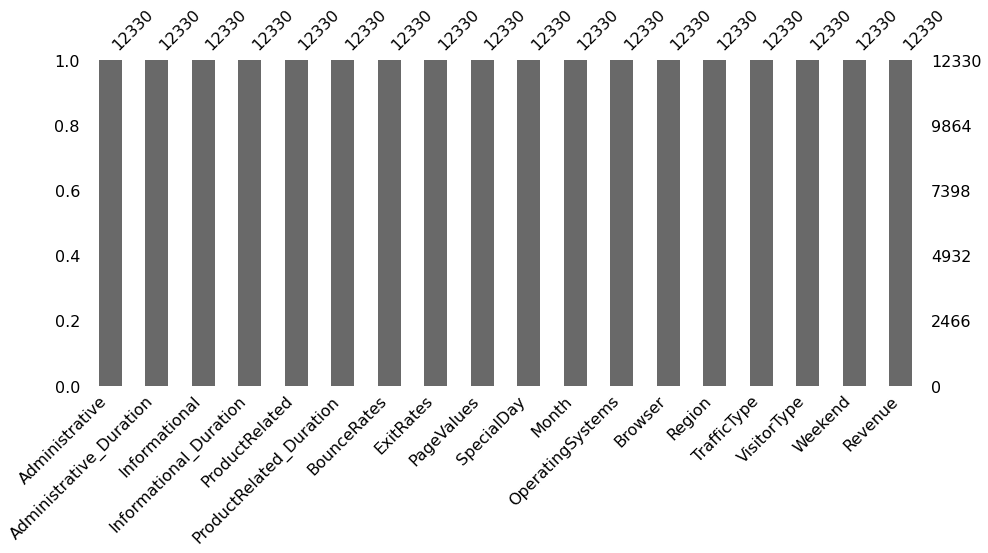

In [118]:
# plotando gráfico de barras com a biblioteca "missingno" e juntamente com a função ".bar()"
# onde tem a função de contabilizar os valores nulos e exibí-los de forma gráfica
msno.bar(df_copia, figsize=(15,6))
plt.savefig('Distribuição de dados faltantes nas colunas.png');

> **Como podemos visualizar, não há valores faltantes nas colunas.**

```python
# podemos remover dados faltantes através do comando abaixo
df_copia.dropna(inplace = True)

```

In [79]:
# verificando a quantidade de instâncias únicas nas colunas
df_copia.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

> Perceba que, na coluna `Month` somente temos 10 instâncias e, sabemos que o correto seria 12, pois se refere a 12 meses.
- vamos visualizar quais instâncias são essas!

In [80]:
# visualizando as instâncias únicas da coluna "Month"
df_copia['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [81]:
# tipo de dado nas colunas
print(f'Coluna \t\t\tTipo de dado \n\n{df_copia.dtypes}')

Coluna 			Tipo de dado 

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


**Vamos visualizar de forma gráfica algumas colunas e suas relações entre si.** 

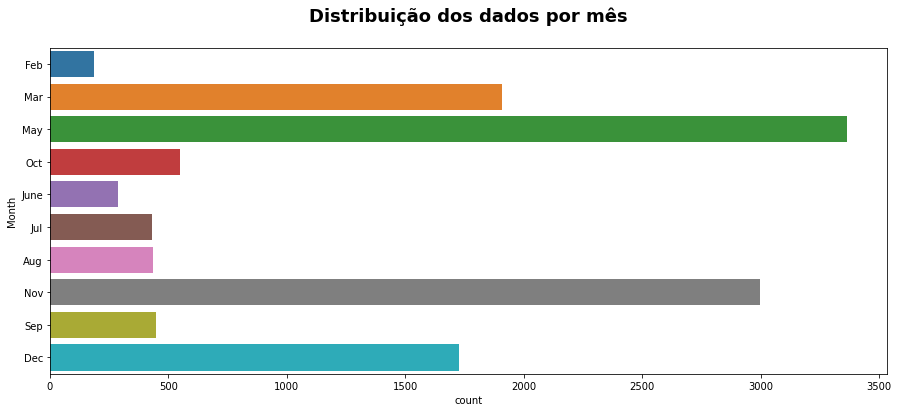

In [101]:
# usando a função ".countplot()" da biblioteca seaborn para visualizar a distribuição por mês
plt.figure(figsize=(15,6))
plt.title('Distribuição dos dados por mês\n', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(data=df_copia, y='Month')
plt.savefig('Distribuição dos dados por mês.png')
plt.show();

In [83]:
# tabela de frequência pra variáveis "Month"
tbl_freq_Month = pd.DataFrame(df_copia['Month'].value_counts())
tbl_freq_Month.rename(columns = {'Month':'freq_absoluta_Month'}, inplace = True)
tbl_freq_Month['freq_relativa_Month'] = round(tbl_freq_Month.freq_absoluta_Month / tbl_freq_Month.freq_absoluta_Month.sum(),3)
print(tbl_freq_Month)

      freq_absoluta_Month  freq_relativa_Month
May                  3364                0.273
Nov                  2998                0.243
Mar                  1907                0.155
Dec                  1727                0.140
Oct                   549                0.045
Sep                   448                0.036
Aug                   433                0.035
Jul                   432                0.035
June                  288                0.023
Feb                   184                0.015


In [84]:
tbl_freq_Month

,freq_absoluta_Month,freq_relativa_Month
May,3364,0.273
Nov,2998,0.243
Mar,1907,0.155
Dec,1727,0.140
Oct,549,0.045
Sep,448,0.036
Aug,433,0.035
Jul,432,0.035
June,288,0.023
Feb,184,0.015


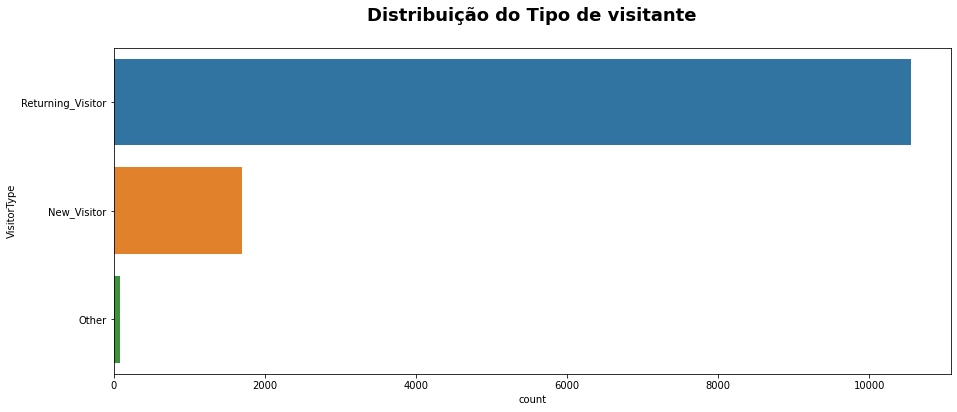

In [103]:
# usando a função ".countplot()" da biblioteca seaborn
plt.figure(figsize=(15,6))
plt.title('Distribuição do Tipo de visitante\n', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(data=df_copia, y='VisitorType')
plt.savefig('Distribuição do Tipo de visitante.png');

In [86]:
# tabela de frequência pra variáveis "VisitorType"
tbl_freq_VisitorType = pd.DataFrame(df_copia['VisitorType'].value_counts())
tbl_freq_VisitorType.rename(columns = {'VisitorType':'freq_absoluta_VisitorType'}, inplace = True)
tbl_freq_VisitorType['freq_relativa_VisitorType'] = round(tbl_freq_VisitorType.freq_absoluta_VisitorType / tbl_freq_VisitorType.freq_absoluta_VisitorType.sum(),3)
print(tbl_freq_VisitorType)

                   freq_absoluta_VisitorType  freq_relativa_VisitorType
Returning_Visitor                      10551                      0.856
New_Visitor                             1694                      0.137
Other                                     85                      0.007


In [87]:
tbl_freq_VisitorType

,freq_absoluta_VisitorType,freq_relativa_VisitorType
Returning_Visitor,10551,0.856
New_Visitor,1694,0.137
Other,85,0.007


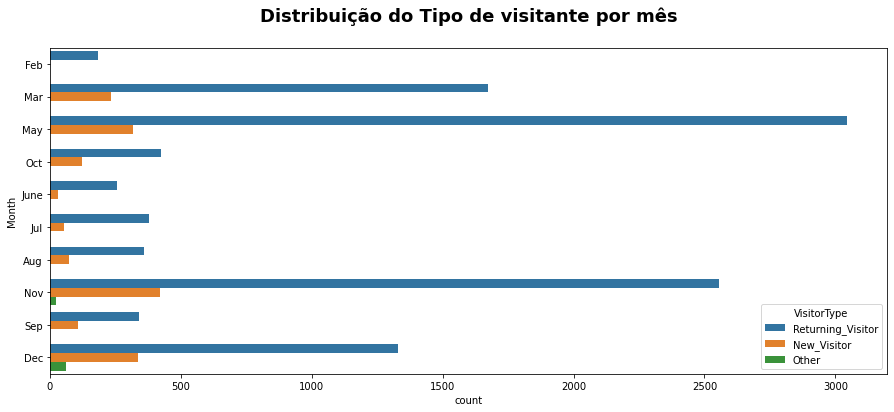

In [94]:
plt.figure(figsize=(15,6))
plt.title('Distribuição do Tipo de visitante por mês\n', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(y='Month', hue= 'VisitorType', data=df_copia)
plt.savefig('Distribuição do Tipo de visitante por mês.png')
plt.show();

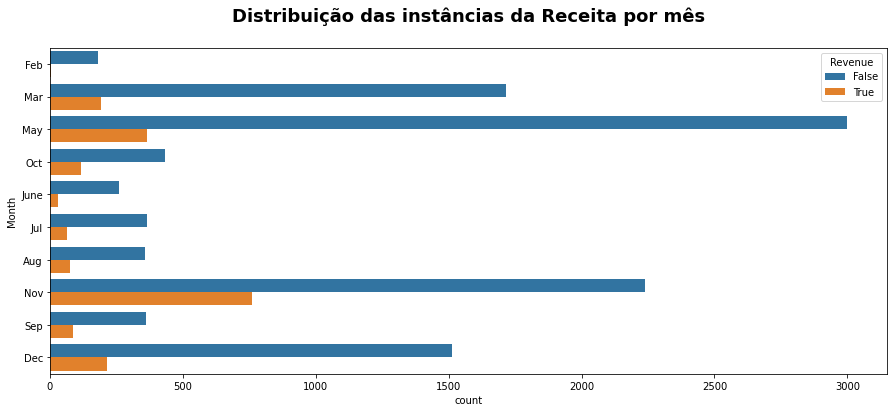

In [96]:
plt.figure(figsize=(15,6))
plt.title('Distribuição das instâncias da Receita por mês\n', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(y='Month', hue= 'Revenue', data=df_copia)
plt.savefig('Distribuição das instâncias da Receita por mês.png')
plt.show();

In [97]:
df_copia['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [98]:
# tabela de frequência pra variável "Revenue"
tbl_freq_Revenue = pd.DataFrame(df_copia['Revenue'].value_counts())
tbl_freq_Revenue.rename(columns = {'Revenue':'freq_absoluta_Revenue'}, inplace = True)
tbl_freq_Revenue['freq_relativa_Revenue'] = round(tbl_freq_Revenue.freq_absoluta_Revenue / tbl_freq_Revenue.freq_absoluta_Revenue.sum(),3)
tbl_freq_Revenue

,freq_absoluta_Revenue,freq_relativa_Revenue
False,10422,0.845
True,1908,0.155


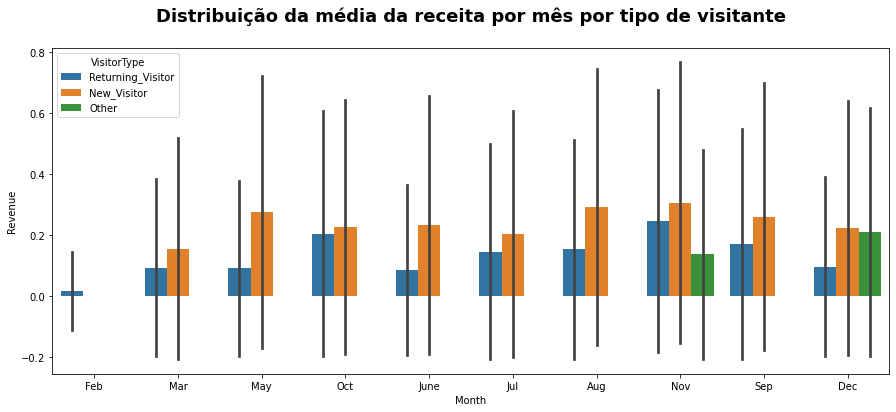

In [100]:
plt.figure(figsize=(15,6))
plt.title('Distribuição da média da receita por mês por tipo de visitante\n', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.barplot(x='Month', y='Revenue', ci ='sd', 
            hue='VisitorType', data=df_copia)
plt.savefig('Distribuição da média da receita por mês por tipo de visitante.png')
plt.show();

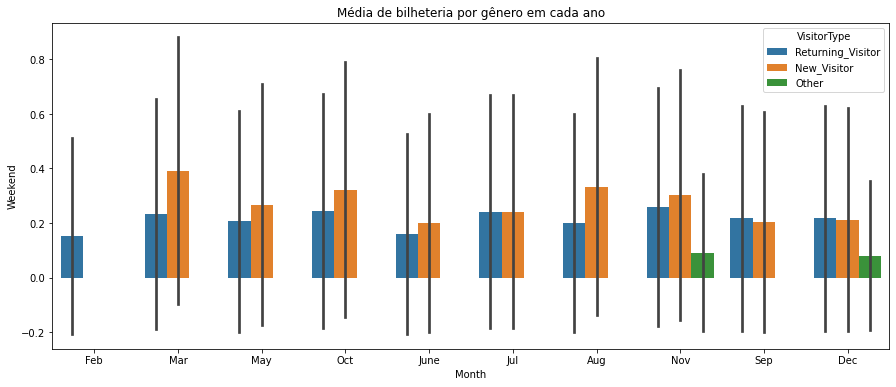

In [104]:
plt.figure(figsize=(15,6))
plt.title('Média de bilheteria por gênero em cada ano')
sns.barplot(x='Month', y='Weekend', hue='VisitorType', ci='sd', 
            data=df_copia)
plt.show();

> Vamos analisar os parâmetros da função barplot(), chamada na linha 3. O parâmetro x recebe a categoria que cada
barra irá representar, enquanto o parâmetro y recebe outra categoria, nesse caso a coluna `Weekend` o hue recebe o tipo de visitante. Será então calculada a média das instâncias por tipo de visitante por final de semana, e esse valor será mapeado no eixo y. Podemos também definir o parâmetro da cor, por exemplo: `color='b'`, a cor referenciada no exemplo ‘b’, ou seja, blue (azul).
Por fim, um novo parâmetro chamado ci (confidence interval) foi utilizado, recebendo o valor 'sd' (standard deviation, o desvio padrão). Por padrão, o parâmetro ci é usado para estimar intervalos de confiança, um intervalo estatístico onde provavelmente se encontra um valor desconhecido. Neste caso, passando o valor ‘sd’, ao invés de intervalo de confiança, é calculado o já conhecido desvio padrão, que indica como os dados se dispersam ao redor da média. O desvio padrão é representado pela linha escura no centro das barras.

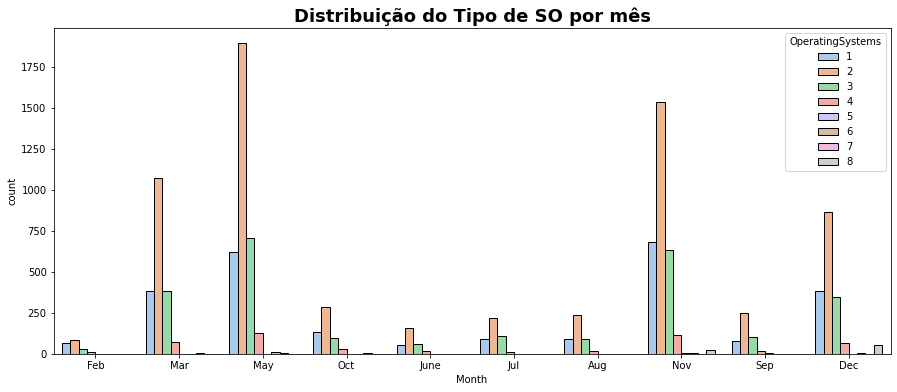

In [105]:
plt.figure(figsize=(15,6))
plt.title('Distribuição do Tipo de SO por mês', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(x='Month', hue='OperatingSystems', palette='pastel',
              edgecolor='0', data=df_copia)
plt.savefig('Distribuição do Tipo de SO por mês.png')

Para facilitar nossas visualizações, iremos dividir os dados em variáveis <font color='orange'>**contínuas**</font> e <font color='orange'>**categóricas**</font>.

- iremos tratar todas as variáveis com menos de 30 entradas únicas como categóricas.

In [119]:
# criando duas listas para armazenar as variáveis contínuas e categóricas
continuous = []
categorical = []

# realizando um loop no "df_copia"
for col in df_copia.columns[:-1]: # excluindo a última coluna - target
    if df_copia.nunique()[col] >= 30:
        continuous.append(col)
    else:
        categorical.append(col)

In [121]:
# visualizando as colunas contínuas
# continuous
print(df_copia[continuous].columns)

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')


In [122]:
# visulizando as 5 primeiras linhas
df_copia[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.693147,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147
1,0.693147,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147
2,0.693147,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147
3,0.693147,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147
4,0.693147,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147


In [123]:
# visualizando as colunas categorical
# categorical
print(df_copia[categorical].columns)

Index(['Administrative', 'Informational', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')


In [124]:
# visulizando as variáveis categóricas
df_copia[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0,0.0,Feb,3,3,1,4,Returning_Visitor,True


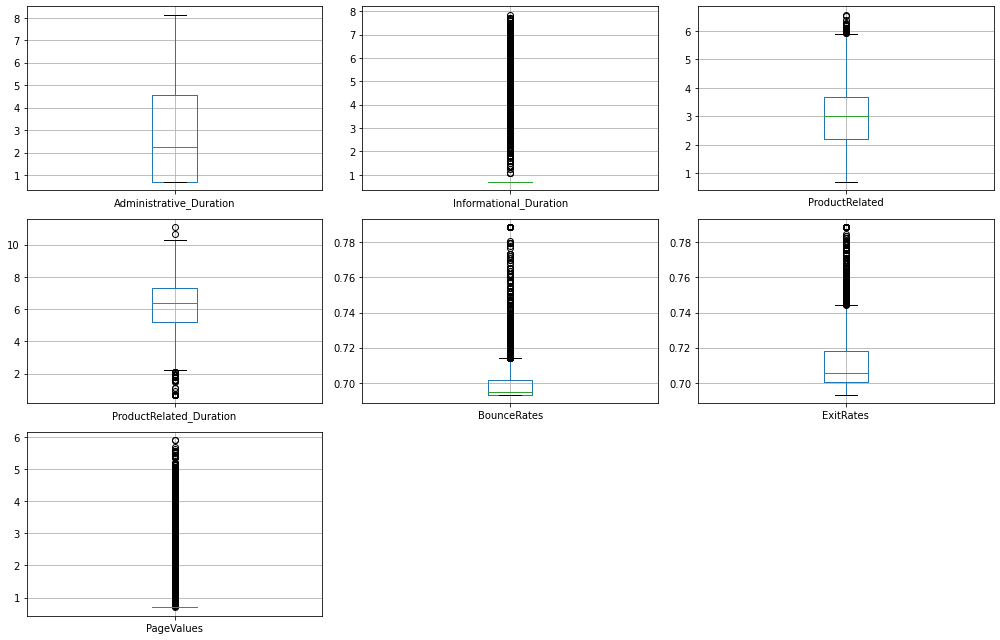

In [129]:
# plot do boxplot das variáveis contínuas para visualização dos outliers

# tamanho da figura
fig = plt.figure(figsize=(14,9))

# realizando loop nas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1)
    df_copia.boxplot(col)
    plt.tight_layout();
    
plt.savefig('boxplot.png') # salvando as imagens dos gráficos

> **Perceba que nas variáveis contínuas há valores extremos.**
- vamos aplicar uma transformação de `log` para melhorar a visualização.

In [130]:
# aplicando "log" nas variáveis contínuas
df_copia[continuous] = np.log1p(1 + df_copia[continuous])

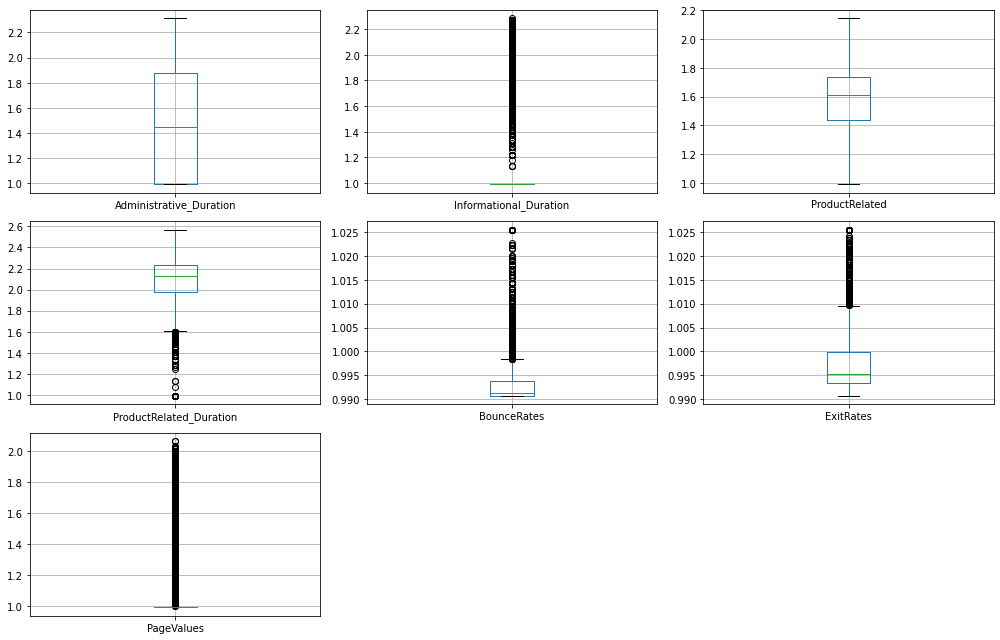

In [131]:
# plotando novamente o boxplot das variáveis contínuas após o tratamento para visualização dos outliers

# tamanho da figura
fig = plt.figure(figsize=(14,9))

# realizando loop nas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1)
    df_copia.boxplot(col)
    plt.tight_layout();

    
plt.savefig('boxplot2.png') # salvando as imagens dos gráficos

**Plotando a "Matriz de Correlação" entre as variáveis contínuas.**

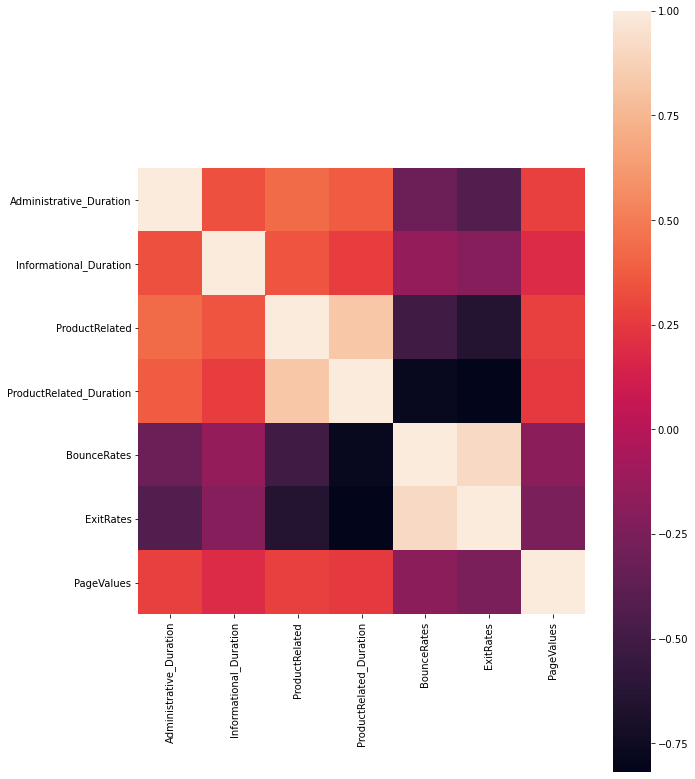

In [132]:
# área da plotagem
plt.figure(figsize=(10, 14))

# matriz de correlação
sns.heatmap(df_copia[continuous].corr(), 
            vmax = 1., square = True);

In [133]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

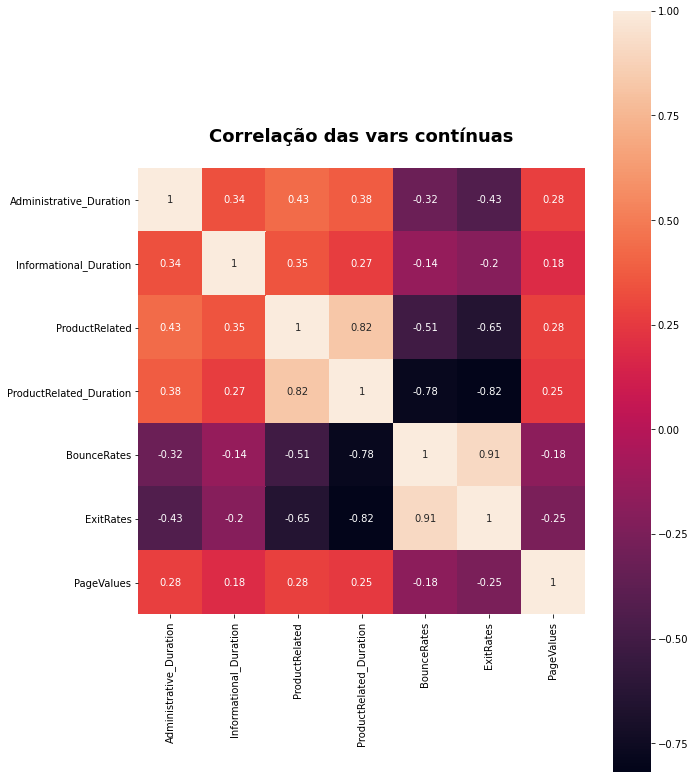

In [134]:
# área da plotagem
plt.figure(figsize=(10, 14))

# matriz de correlação
plt.title('Correlação das vars contínuas\n', 
                      {'fontsize': 18,'fontweight': 'bold'})

sns.heatmap(df_copia[['Administrative_Duration', 
               'Informational_Duration', 
               'ProductRelated',
               'ProductRelated_Duration',
               'BounceRates', 
               'ExitRates', 
               'PageValues']].corr(), 
            vmax = 1., square = True, annot=True);

In [137]:
# visualizando as correlações das features com a nossa target
df_copia.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.167693
Informational              0.095200
Informational_Duration     0.112808
ProductRelated             0.200450
ProductRelated_Duration    0.182879
BounceRates               -0.152195
ExitRates                 -0.209688
PageValues                 0.635141
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

**Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é influenciada por elas.**

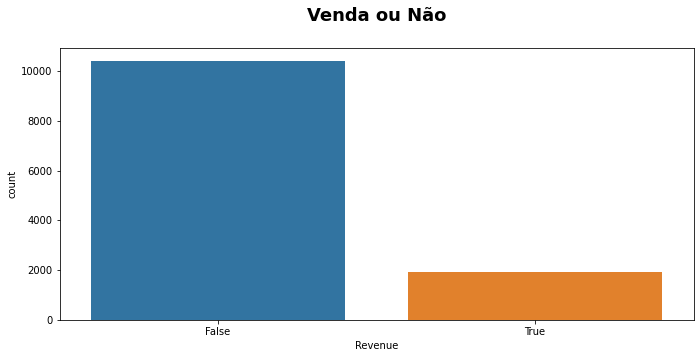

In [160]:
# aplicando o "countplot" de Venda ou Não
plt.figure(figsize=(25, 5))
plt.subplot(1,2,2)
plt.title('Venda ou Não\n', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(df['Revenue']);

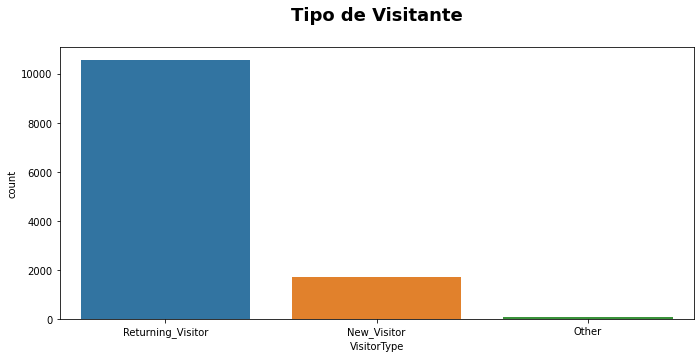

In [159]:
# aplicando o "countplot" de Tipo de Visitante
plt.figure(figsize=(25, 5))
plt.subplot(1,2,2)
plt.title('Tipo de Visitante\n', 
         {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(df['VisitorType']);

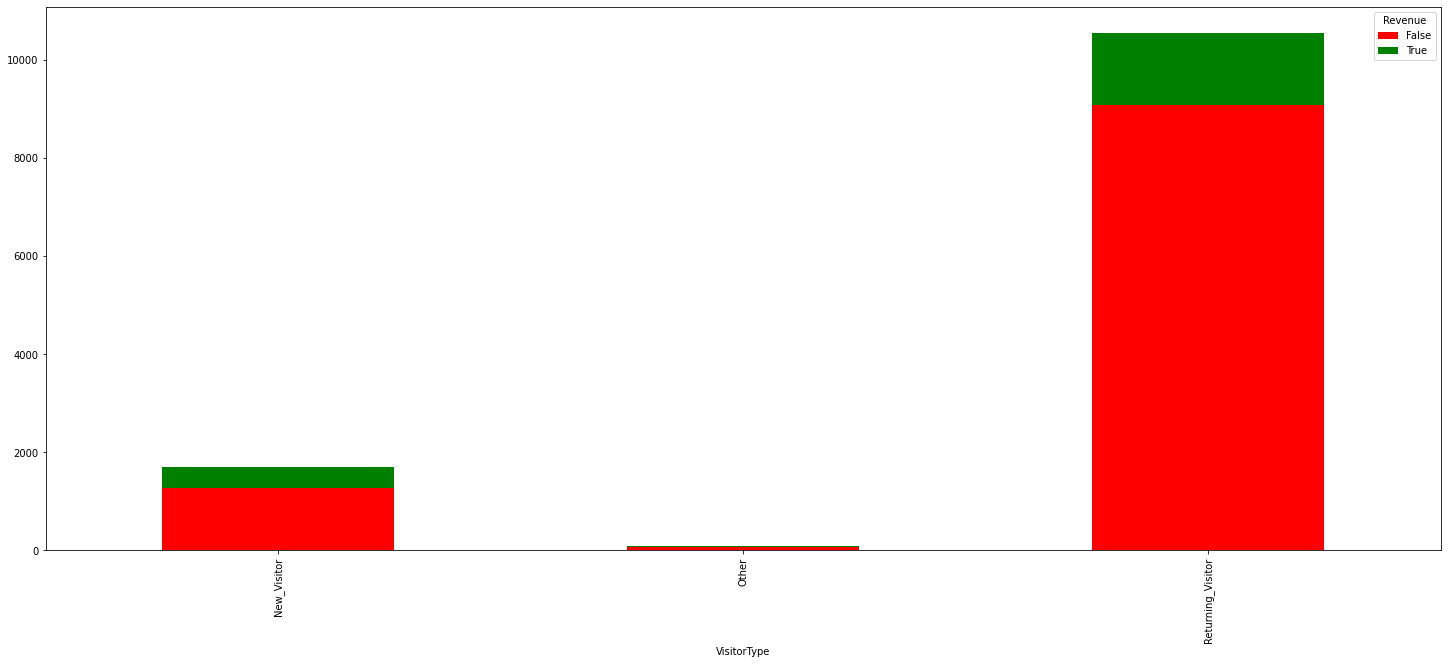

In [157]:
# stacked bar Tipo de Visitantes vs Revenue
pd.crosstab(df['VisitorType'], 
            df['Revenue']).plot(kind= 'bar', 
                               stacked = True, 
                               figsize = (25, 10), 
                               color = ['red', 'green']);

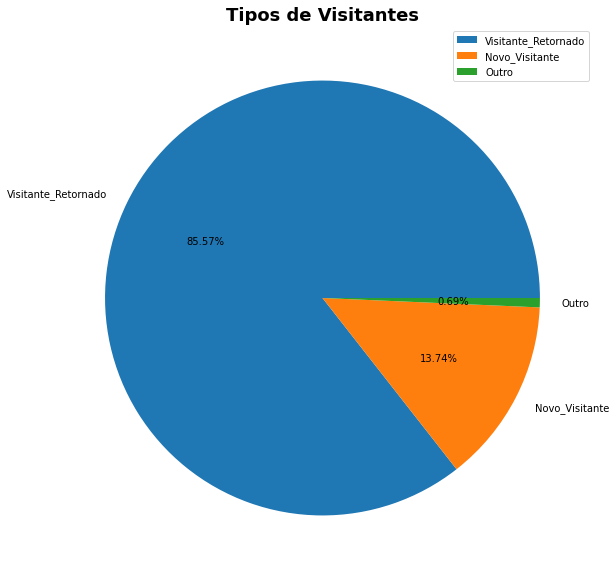

In [156]:
# pie chart para Tipos de Visitantes
plt.figure(figsize=(25, 10))
labels = ['Visitante_Retornado', 
         'Novo_Visitante', 
         'Outro']
plt.title('Tipos de Visitantes', 
         {'fontsize': 18,'fontweight': 'bold'})
plt.pie(df['VisitorType'].value_counts(), 
       labels = labels, autopct = '%.2f%%')
plt.legend();

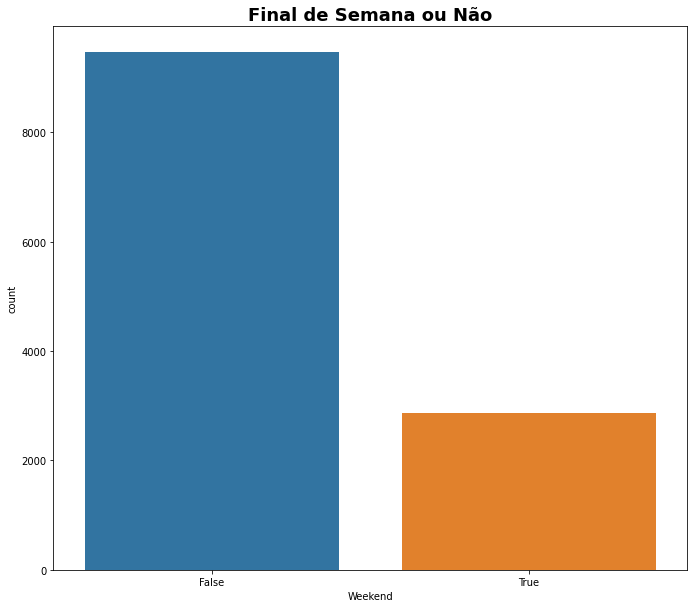

In [155]:
# countplot Final de Semana ou Não
plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)
plt.title('Final de Semana ou Não', 
          {'fontsize': 18,'fontweight': 'bold'})
sns.countplot(df['Weekend']);

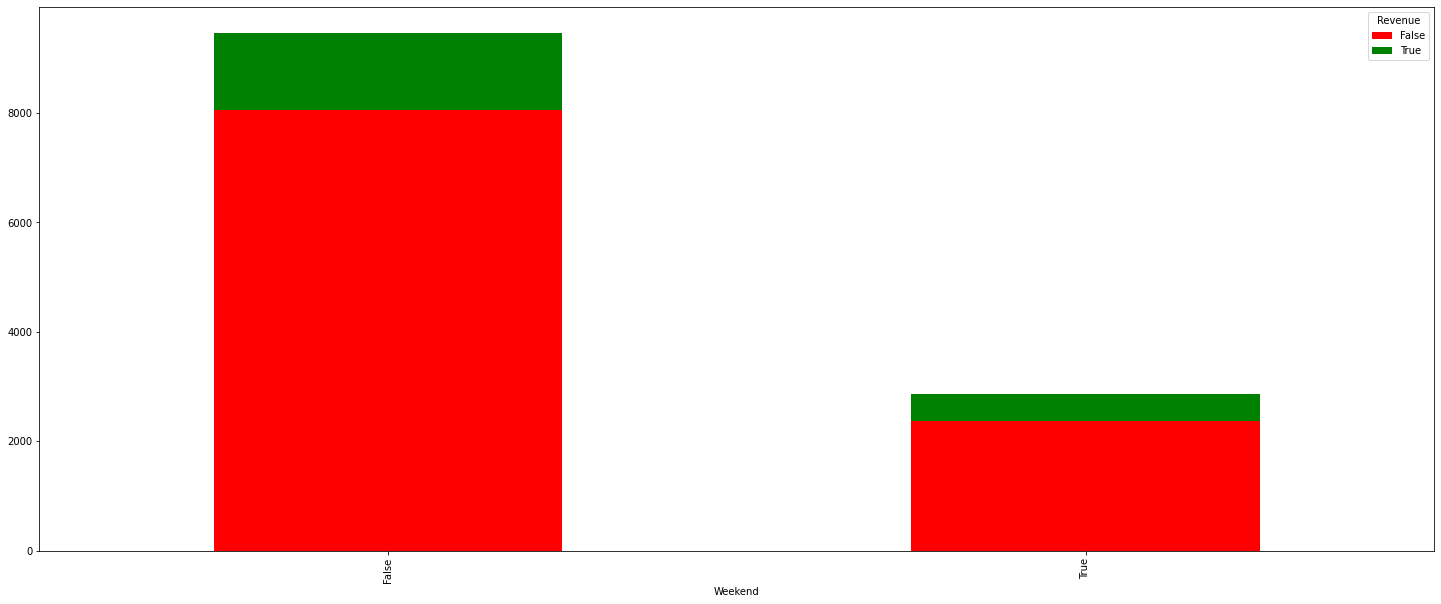

In [154]:
# stacked bar Final de Semana vs Revenue
pd.crosstab(df['Weekend'], 
            df['Revenue']).plot(kind= 'bar', 
                               stacked = True, 
                               figsize = (25, 10), 
                               color = ['red', 'green']);

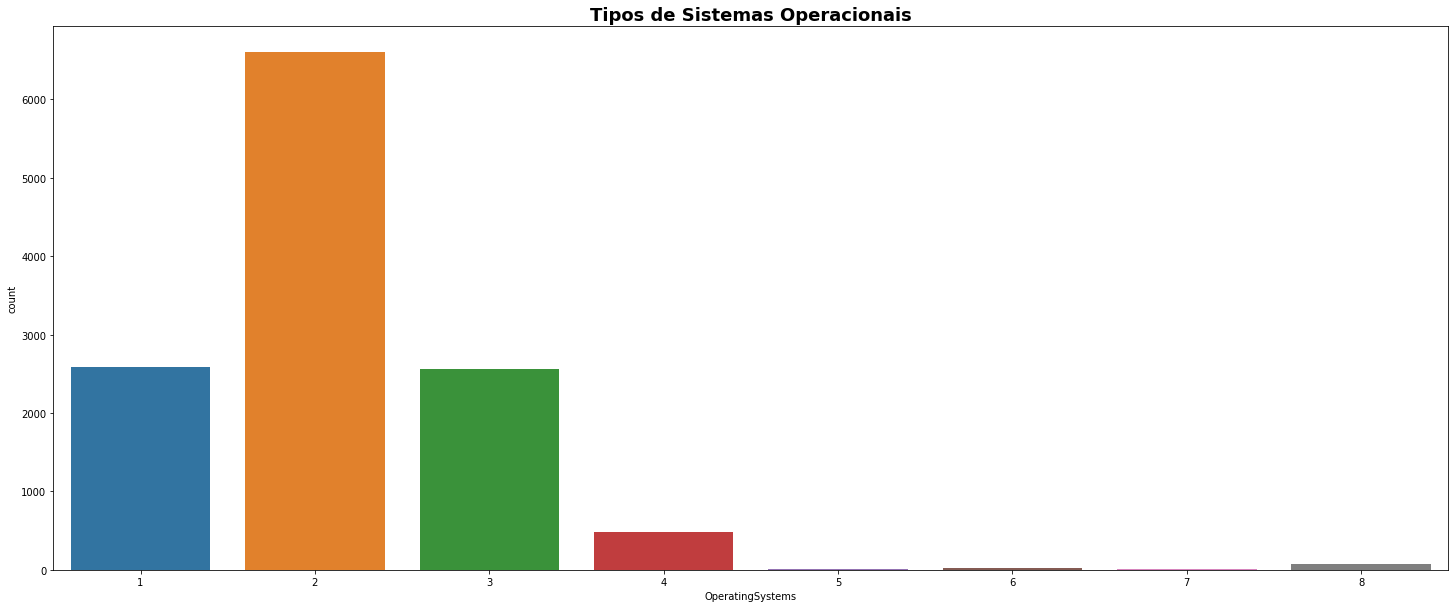

In [161]:
# countplot Tipos de Sistemas Operacionais
plt.figure(figsize=(25, 10))
plt.title('Tipos de Sistemas Operacionais', 
          {'fontsize': 18,'fontweight': 'bold'})
plt.xlabel('Sistema Operacional Usado')
sns.countplot(df['OperatingSystems']);

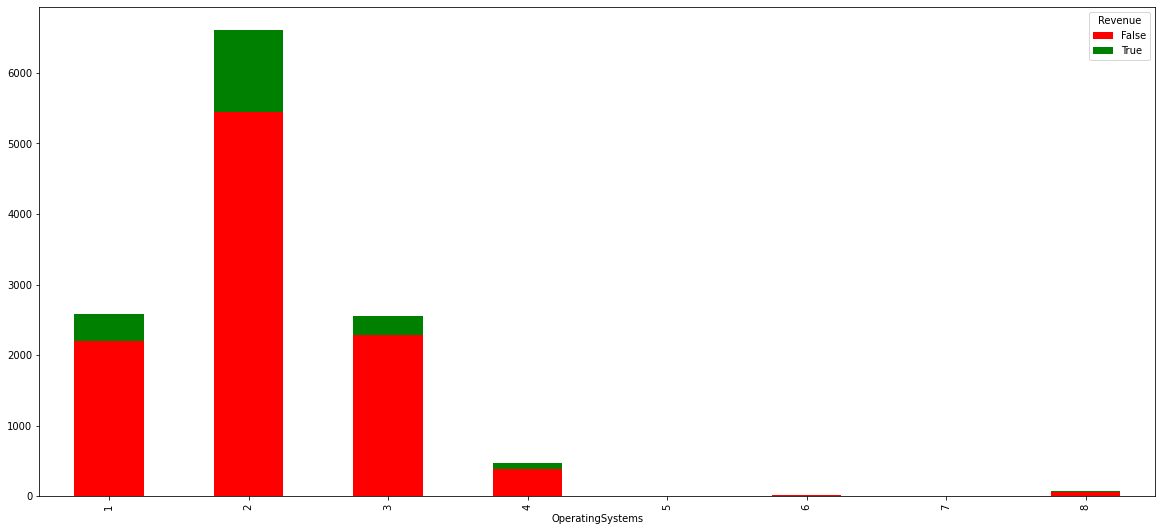

In [162]:
# stacked bar Tipos de Sistema Operacionais vs Revenue
pd.crosstab(df['OperatingSystems'], 
            df['Revenue']).plot(kind= 'bar', 
                               stacked = True, 
                               figsize = (20, 9), 
                               color = ['red', 'green']);

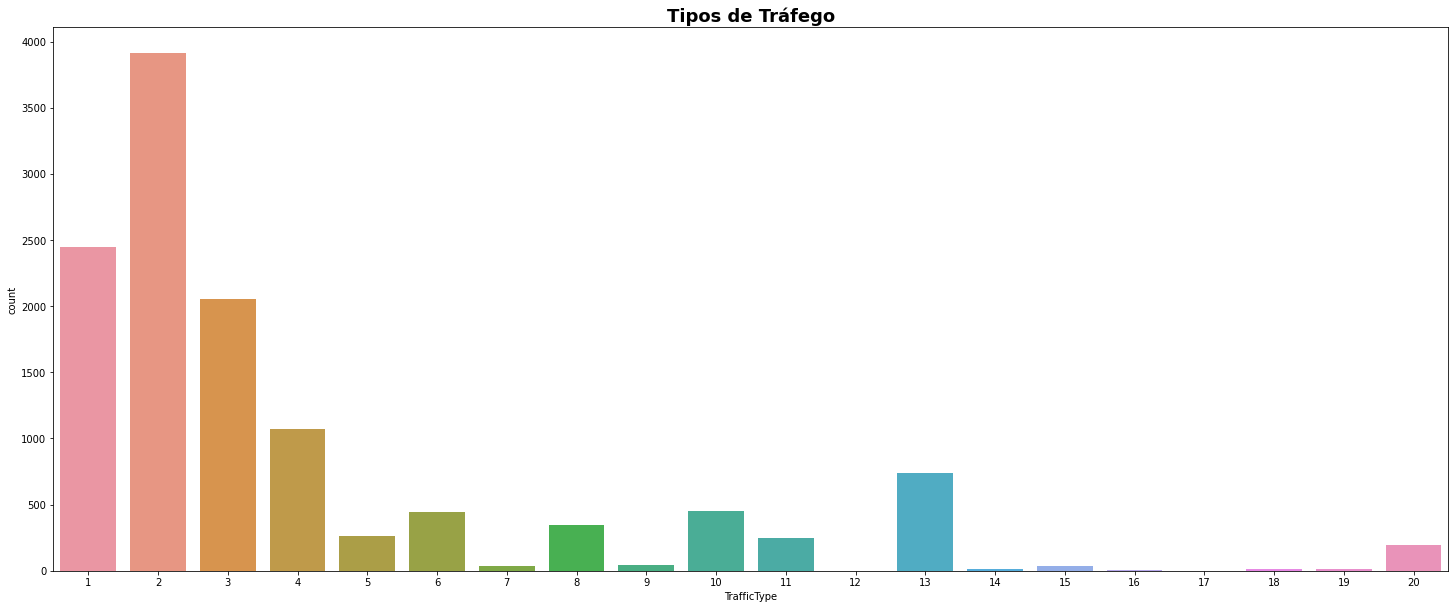

In [163]:
# count Tipo de Tráfego
plt.figure(figsize=(25, 10))
plt.title('Tipos de Tráfego', 
         {'fontsize': 18,'fontweight': 'bold'})
plt.xlabel('Tipo de Tráfego')
sns.countplot(df['TrafficType']);

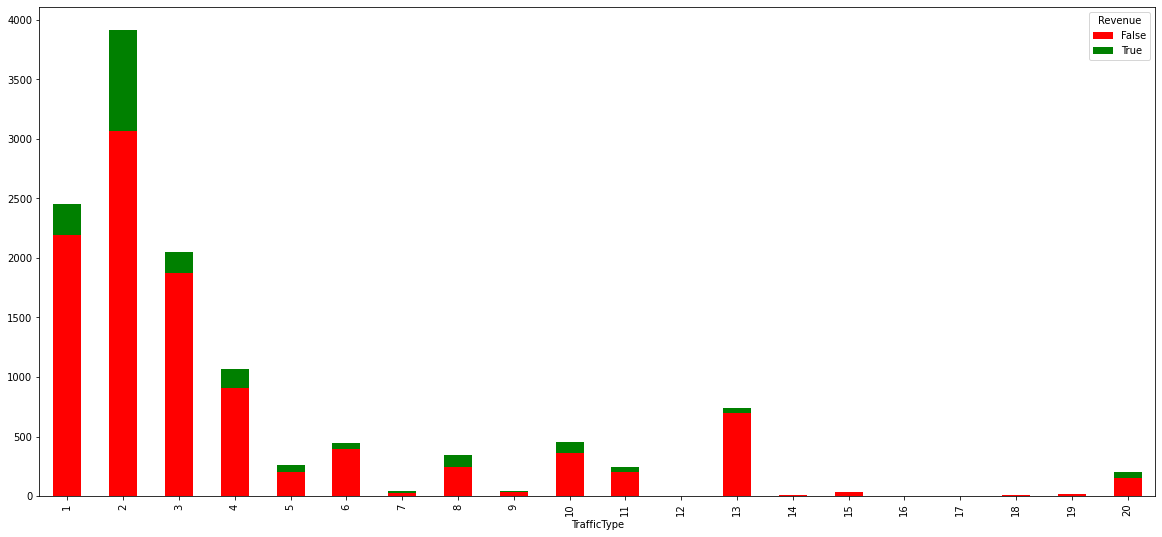

In [164]:
# stacked bar Tipo de Tráfego vs Revenue
pd.crosstab(df['TrafficType'], 
            df['Revenue']).plot(kind= 'bar', 
                               stacked = True, 
                               figsize = (20, 9), 
                               color = ['red', 'green']);

### <font color='green'>**Pré-processamento do Dados (DPP - Data pre-processing)**<font>

In [166]:
# visualizando o conjunto de dados original
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.693147,0,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.693147,0,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.693147,0,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [167]:
# instaciando o modelo "LabelEncoder"
le = LabelEncoder()

In [168]:
# aplicando o modelo nas variáveis que são do tipo object (string)
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])

In [169]:
# removendo os valores "missing" eventualmente gerados
df.dropna(inplace=True)

In [170]:
# visualizando as 10 primeiras linhas
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,2,1,1,1,1,2,False,False
1,0,0.693147,0,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.0,2,2,2,1,2,2,False,False
2,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,2,4,1,9,3,2,False,False
3,0,0.693147,0,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.0,2,3,2,2,4,2,False,False
4,0,0.693147,0,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.0,2,3,3,1,4,2,True,False
5,0,0.693147,0,0.693147,3.044522,5.051244,0.701011,0.705353,0.693147,0.0,2,2,2,1,3,2,False,False
6,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.4,2,2,4,3,3,2,False,False
7,1,0.693147,0,0.693147,0.693147,0.693147,0.788457,0.788457,0.693147,0.0,2,1,2,1,5,2,True,False
8,0,0.693147,0,0.693147,1.386294,3.663562,0.693147,0.741937,0.693147,0.8,2,2,2,2,3,2,False,False
9,0,0.693147,0,0.693147,1.609438,6.606650,0.693147,0.704197,0.693147,0.4,2,2,4,1,2,2,False,False


In [171]:
# visualizando as 10 últimas linhas
df.tail(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0,0.693147,0,0.693147,2.302585,4.980749,0.700265,0.717840,0.693147,0.0,7,2,2,3,1,2,False,False
12321,0,0.693147,0,0.693147,2.079442,0.693147,0.788457,0.788457,0.693147,0.0,7,1,8,4,1,2,False,False
12322,6,4.359909,0,0.693147,3.178054,6.982167,0.693147,0.695228,0.693147,0.0,1,2,2,4,2,2,False,False
12323,2,4.200954,0,0.693147,3.828641,7.056155,0.693147,0.700100,0.693147,0.0,7,2,2,1,10,2,False,False
12324,0,0.693147,1,0.693147,2.890372,6.224558,0.693147,0.711796,0.693147,0.0,7,2,2,1,1,2,False,False
12325,3,4.990433,0,0.693147,4.007333,7.487617,0.696712,0.707558,2.656176,0.0,1,4,6,1,1,2,True,False
12326,0,0.693147,0,0.693147,1.945910,6.147934,0.693147,0.703757,0.693147,0.0,7,3,2,1,8,2,True,False
12327,0,0.693147,0,0.693147,2.079442,5.227090,0.733969,0.735568,0.693147,0.0,7,3,2,1,13,2,True,False
12328,4,4.343805,0,0.693147,2.833213,5.852202,0.693147,0.703618,0.693147,0.0,7,2,2,3,11,2,False,False
12329,0,0.693147,0,0.693147,1.609438,3.146305,0.693147,0.725937,0.693147,0.0,7,3,2,1,2,0,True,False


In [172]:
# quantidades de linhas e colunas
df.shape

(12330, 18)

In [173]:
# verificando se a variável alvo está balanceada
target_count = df.Revenue.value_counts(); target_count

False    10422
True      1908
Name: Revenue, dtype: int64

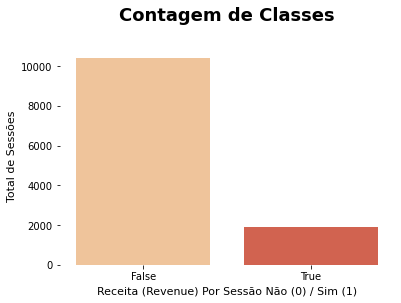

In [174]:
sns.countplot(df['Revenue'], palette = 'OrRd')
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', 
          fontsize = 11)
plt.ylabel('Total de Sessões', fontsize =11)
plt.title('Contagem de Classes\n', 
         {'fontsize': 18,'fontweight': 'bold'})
plt.show();

In [175]:
# instalando e importando a biblioteca "imblearn"
# para realizar o balanceamento da variável resposta
!pip install -q imblearn

import imblearn

In [176]:
# versões das bibliotecas utilizadas neste notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão - Machine Learning com SVM #LeadDELL' --iversions

Author: Fernando Galvão - Machine Learning com SVM #LeadDELL

IPython   : 5.5.0
numpy     : 1.19.5
imblearn  : 0.0
google    : 2.0.3
matplotlib: 3.2.2
sklearn   : 0.0
seaborn   : 0.11.1
missingno : 0.5.0
pandas    : 1.1.5



In [177]:
# quantidades de linhas e colunas
df.shape

(12330, 18)

In [178]:
# variáveis explicativas
df.iloc[:, :17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,2,1,1,1,1,2,False
1,0,0.693147,0,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.0,2,2,2,1,2,2,False
2,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,2,4,1,9,3,2,False
3,0,0.693147,0,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.0,2,3,2,2,4,2,False
4,0,0.693147,0,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.0,2,3,3,1,4,2,True


In [179]:
# variável alvo
df.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

## <font color='blue'>**Balanceamento de Classe - Oversampling**</font>

In [180]:
# importando a função
from imblearn.over_sampling import SMOTE 

In [181]:
# seed para reproduzir o mesmo resultado
seed = 100

In [182]:
# separando X e y
X = df.iloc[:, :17]
y = df.iloc[:, 17]

In [183]:
# instanciando o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)
# sm = SMOTE(random_state=100)

In [184]:
# aplicando o balanceamento
X_res, y_res = smote_bal.fit_resample(X, y)
# X_res, y_res = sm.fit_resample(X, y)

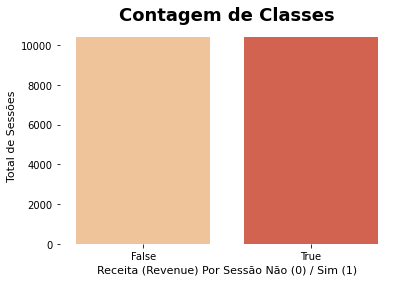

In [185]:
# plotando gráfico
sns.countplot(y_res, palette = 'OrRd')
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', 
         fontsize = 11)
plt.ylabel('Total de Sessões', 
          fontsize = 11)
plt.title('Contagem de Classes', 
         {'fontsize': 18,'fontweight': 'bold'})
plt.show();

In [186]:
# quantidade de linhas e colunas
df.shape

(12330, 18)

In [187]:
# quantidade de dados após o tratamento
y_res.shape

(20844,)

In [188]:
# ajustando o "X" e "y"
X = X_res
y = y_res

In [189]:
# divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3,
                                                   random_state = 42)

In [190]:
# visualizando a quantidade de dados de treino e teste
print('Quantidade de dados:')
print(f'''X_train: {X_train.shape} 
X_test: {X_test.shape} 
y_train: {y_train.shape}
y_test: {y_test.shape}''')

Quantidade de dados:
X_train: (14590, 17) 
X_test: (6254, 17) 
y_train: (14590,)
y_test: (6254,)


## <font color='green'>**Aplicando o SVM**<font>

### <font color='orange'>**Modelo com kernel "Linear"**</font>

In [191]:
# instanciando o modelo
mod_1 = svm.SVC(kernel = 'linear')

In [192]:
# treinando o modelo - duração em média de 133 segundos com TPU no google colab
start = time.time()
mod_1.fit(X_train, y_train)
end = time.time()
print('Tempo de treinamento do mod_1: ', end - start)

Tempo de treinamento do mod_1:  133.64319586753845


In [193]:
# realizando as previsões
pred_1 = mod_1.predict(X_test)

In [194]:
# dicionário de métricas e metadados
SVM_dict_mod_1 = {
    'Modelo': 'SVM',
    'Versão': '1',
    'Kernel': 'Linear',
    'Precision': precision_score(pred_1, y_test),
    'Recall': recall_score(pred_1, y_test),
    'F1 Score': f1_score(pred_1, y_test),
    'Acurácia': accuracy_score(pred_1, y_test),
    'AUC': roc_auc_score(pred_1, y_test)
}

In [195]:
print('Métricas de testes:\n')
SVM_dict_mod_1

Métricas de testes:



{'AUC': 0.8457718457053894,
 'Acurácia': 0.8415414134953629,
 'F1 Score': 0.8324598478444634,
 'Kernel': 'Linear',
 'Modelo': 'SVM',
 'Precision': 0.7863302459278186,
 'Recall': 0.8843390804597702,
 'Versão': '1'}

### <font color='orange'>**Modelo com kernel "Linear" e dados padronizados (Scaled)**</font>

In [196]:
# realizando a padronização dos dados

# instanciando o modelo para escalar os dados
sc = StandardScaler()

# realizando a padronização dos dados
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

> ### <font color='red'>**Obs:**</font> somente aplique a padronização depois de ter feito a divisão dos dados em treino e teste.

In [197]:
# visualizando a transformação dos dados de treino
X_train_scaled

array([[-0.50190137, -0.24080127,  0.30796624, ..., -0.50762296,
         0.46594146, -0.5899877 ],
       [-0.27789105,  0.53680908, -0.44903681, ..., -0.70081115,
         0.46594146, -0.5899877 ],
       [-0.66489761, -1.12431561,  0.63875217, ..., -0.7572875 ,
         0.46594146,  0.50494788],
       ...,
       [-0.79139855, -1.12431561, -0.44903681, ..., -0.00829388,
         0.46594146, -0.5899877 ],
       [-0.79139855, -1.12431561, -0.44903681, ..., -0.50762296,
        -2.30016935, -0.5899877 ],
       [-0.62186371, -0.40435855, -0.44903681, ...,  3.98633878,
         0.46594146, -0.5899877 ]])

In [198]:
# visualizando a transformação dos dados de teste
X_test_scaled

array([[ 0.07709299,  1.44582089, -0.44903681, ..., -0.50762296,
         0.46594146, -0.5899877 ],
       [ 0.94558452,  1.26233199,  0.86761642, ...,  0.74069975,
         0.46594146, -0.26335853],
       [-0.79139855, -1.12431561, -0.44903681, ...,  0.74714535,
        -2.30016935, -0.5899877 ],
       ...,
       [ 2.75044832,  1.24930669,  0.30796624, ...,  1.66531591,
         0.46594146, -0.5899877 ],
       [-0.79139855, -1.12431561, -0.44903681, ..., -0.00829388,
         0.46594146, -0.5899877 ],
       [-0.79139855, -1.12431561, -0.44903681, ..., -0.31973328,
        -2.30016935, -0.5899877 ]])

In [199]:
# instanciando o modelo
mod_2 = svm.SVC(kernel = 'linear')

In [200]:
# treinando o modelo - duração em média de 120 minutos com TPU
start = time.time()
mod_2.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de treinamento do mod_2: ', end - start)

Tempo de treinamento do mod_2:  10.375710725784302


In [201]:
# realizando as previsões
pred_2 = mod_2.predict(X_test_scaled)

In [202]:
# dicionário de métricas e metadados
SVM_dict_mod_2 = {
    'Modelo': 'SVM',
    'Versão': '2',
    'Kernel': 'Linear',
    'Precision': precision_score(pred_2, y_test),
    'Recall': recall_score(pred_2, y_test),
    'F1 Score': f1_score(pred_2, y_test),
    'Acurácia': accuracy_score(pred_2, y_test),
    'AUC': roc_auc_score(pred_2, y_test)
}

In [203]:
print('Métricas de testes:\n')
SVM_dict_mod_2

Métricas de testes:



{'AUC': 0.8456347874121112,
 'Acurácia': 0.8413815158298689,
 'F1 Score': 0.832262428136625,
 'Kernel': 'Linear',
 'Modelo': 'SVM',
 'Precision': 0.7860108591504311,
 'Recall': 0.8842975206611571,
 'Versão': '2'}

###  <font color='orange'>**Otimização dos hiperparâmetros com Grid Search e kernel "RBF"**</font>

In [204]:
# instanciando o modelo
mod_3 = svm.SVC(kernel = 'rbf')

In [205]:
# definindo os valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3.0*0.001])

In [206]:
# instanciando o grid dos hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

In [207]:
# instanciando o modelo
start = time.time()
mod_3_grid_search_rbf = GridSearchCV(mod_3, 
                                    svm_param_grid,
                                    cv = 3)

In [208]:
# treinando o modelo
mod_3_grid_search_rbf.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de treinamento do modelo com Grid Search: ', end - start)

Tempo de treinamento do modelo com Grid Search:  89.88041424751282


In [209]:
# acurácia do modelo em treinamento
print(f'Acurácia em treinamento: {mod_3_grid_search_rbf.best_score_ :.2%}\n')
print(f'Hiperparâmetros ideais: {mod_3_grid_search_rbf.best_params_}')

Acurácia em treinamento: 88.08%

Hiperparâmetros ideais: {'C': 200.0, 'gamma': 0.003}


In [210]:
# avaliando as previsões
pred_3 = mod_3_grid_search_rbf.predict(X_test_scaled)

In [211]:
# dicionário de métricas e metadados
SVM_dict_mod_3 = {
    'Modelo': 'SVM',
    'Versão': '3',
    'Kernel': 'RBF com dados padronizados',
    'Precision': precision_score(pred_3, y_test),
    'Recall': recall_score(pred_3, y_test),
    'F1 Score': f1_score(pred_3, y_test),
    'Acurácia': accuracy_score(pred_3, y_test),
    'AUC': roc_auc_score(pred_3, y_test)
}

In [212]:
print('Métricas de testes:\n')
SVM_dict_mod_3

Métricas de testes:



{'AUC': 0.8749582234651423,
 'Acurácia': 0.8744803325871442,
 'F1 Score': 0.8723369653602212,
 'Kernel': 'RBF com dados padronizados',
 'Modelo': 'SVM',
 'Precision': 0.8565953369530501,
 'Recall': 0.8886679920477137,
 'Versão': '3'}

### <font color='orange'>**Otimização dos hiperparâmetros com Grid Search e kernel "Polinomial"**</font>

In [213]:
# instanciando o modelo
mod_4 = svm.SVC(kernel = 'poly')

In [214]:
# definindo os valores para o grid
r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2, 3, 4])

In [215]:
# instanciando o grid dos hiperparâmetros
svm_param_grid_poly = dict(gamma = gamma_range, 
                      degree = d_range,
                     coef0 = r_range)

In [216]:
# instanciando o modelo
start = time.time()
mod_4_grid_search_poly = GridSearchCV(mod_4, 
                                    svm_param_grid_poly,
                                    cv = 3)

In [217]:
# treinando o modelo
mod_4_grid_search_poly.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de treinamento do modelo com Grid Search: ', end - start)

Tempo de treinamento do modelo com Grid Search:  66.2412941455841


In [218]:
# acurácia do modelo em treinamento
print(f'Acurácia em treinamento: {mod_4_grid_search_poly.best_score_ :.2%}\n')
print(f'Hiperparâmetros ideais: {mod_4_grid_search_poly.best_params_}')

Acurácia em treinamento: 86.31%

Hiperparâmetros ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [219]:
# avaliando as previsões
pred_4 = mod_4_grid_search_poly.predict(X_test_scaled)

In [220]:
# dicionário de métricas e metadados
SVM_dict_mod_4 = {
    'Modelo': 'SVM',
    'Versão': '4',
    'Kernel': 'Polinomial com dados padronizados',
    'Precision': precision_score(pred_4, y_test),
    'Recall': recall_score(pred_4, y_test),
    'F1 Score': f1_score(pred_4, y_test),
    'Acurácia': accuracy_score(pred_4, y_test),
    'AUC': roc_auc_score(pred_4, y_test)
}

In [221]:
print('Métricas de testes:\n')
SVM_dict_mod_4

Métricas de testes:



{'AUC': 0.862644324060394,
 'Acurácia': 0.8612088263511353,
 'F1 Score': 0.8568601583113455,
 'Kernel': 'Polinomial com dados padronizados',
 'Modelo': 'SVM',
 'Precision': 0.8297668476525072,
 'Recall': 0.885782475281282,
 'Versão': '4'}

In [222]:
# realizando a concatenação de todos os dicionários em um dataframe do pandas
resumo = pd.DataFrame({
    'SVM_dict_mod_1': pd.Series(SVM_dict_mod_1), 
    'SVM_dict_mod_2': pd.Series(SVM_dict_mod_2), 
    'SVM_dict_mod_3': pd.Series(SVM_dict_mod_3), 
    'SVM_dict_mod_4': pd.Series(SVM_dict_mod_4)
})

# visualizando o dataframe criado com as métricas de avalição
resumo

,SVM_dict_mod_1,SVM_dict_mod_2,SVM_dict_mod_3,SVM_dict_mod_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear,RBF com dados padronizados,Polinomial com dados padronizados
Precision,0.78633,0.786011,0.856595,0.829767
Recall,0.884339,0.884298,0.888668,0.885782
F1 Score,0.83246,0.832262,0.872337,0.85686
Acurácia,0.841541,0.841382,0.87448,0.861209
AUC,0.845772,0.845635,0.874958,0.862644


### <font color='green'>**Fazendo previsões com o modelo treinado**<font>

In [223]:
# instanciando dados de um novo cliente - valores fictícios
# 
novo_cliente = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 
                       0.60, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, 
                        False]).reshape(1, -1)

In [224]:
# padronizando os dados do novo cliente
novo_cliente_scaled = StandardScaler().fit_transform(novo_cliente)

In [226]:
# realizando a previsão
pred_novo_cliente = mod_3_grid_search_rbf.predict(novo_cliente_scaled)

In [227]:
# visualizando a previsão
pred_novo_cliente

array([ True])

> <font color='orange'>**Esse cliente tem probabilidades de realizar compra no site**</font>